# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"+ "appid=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?appid=434f6df2e59d396ad9b46ba9a488811d'

In [48]:
city_url = f"{url}&q={city}"
city_url
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 121.4233, 'lat': 13.9311},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 303.37,
  'feels_like': 307.06,
  'temp_min': 303.37,
  'temp_max': 303.37,
  'pressure': 1009,
  'humidity': 63,
  'sea_level': 1009,
  'grnd_level': 1001},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 250, 'gust': 4.22},
 'clouds': {'all': 100},
 'dt': 1686625375,
 'sys': {'type': 2,
  'id': 2011004,
  'country': 'PH',
  'sunrise': 1686605170,
  'sunset': 1686651745},
 'timezone': 28800,
 'id': 1719274,
 'name': 'Candelaria',
 'cod': 200}

In [49]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"+ "appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url +"&qi"+ urllib.request.pathname2url[city]
    city_url = f"{url}&q={city}&units=metric"
#Response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(f"Processing Record {record_count} of Set {set_count}|{city}")      

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuku'alofa
Processing Record 2 of Set 1 | arrifes
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | tazovsky
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | conde
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | kutum
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | el calafate
Processing Record 20 of Set 1 | singkil
Processing Record 21 of Set 1 | san antonio oeste
Processing Record 22 of

Processing Record 39 of Set 4 | hawaiian paradise park
Processing Record 40 of Set 4 | henderson
Processing Record 41 of Set 4 | chinde
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | ust-nera
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | chibougamau
Processing Record 47 of Set 4 | nemuro
Processing Record 48 of Set 4 | xilin hot
Processing Record 49 of Set 4 | chistopol'
Processing Record 0 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 1 of Set 5 | mitu
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | kaliua
Processing Record 4 of Set 5 | akouda
Processing Record 5 of Set 5 | ordubad
Processing Record 6 of Set 5 | ebon
Processing Record 7 of Set 5 | anibare
City not found. Skipping...
Processing Record 8 of Set 5 | kirillov
Processing Record 9 of Set 5 | uturoa
Processing Record 10 of Set 5 | isangel
Processing Record 11 of Set 5 | saint-jos

City not found. Skipping...
Processing Record 30 of Set 8 | serdar
Processing Record 31 of Set 8 | amos
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | tuy hoa
Processing Record 34 of Set 8 | kasaragod
Processing Record 35 of Set 8 | suntar
Processing Record 36 of Set 8 | mumford
Processing Record 37 of Set 8 | illizi
Processing Record 38 of Set 8 | egilsstadir
Processing Record 39 of Set 8 | truth or consequences
Processing Record 40 of Set 8 | camacupa
Processing Record 41 of Set 8 | undurkhaan
Processing Record 42 of Set 8 | kolonia town
Processing Record 43 of Set 8 | ust'-kut
Processing Record 44 of Set 8 | sharan
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | itamaraca
Processing Record 47 of Set 8 | natal
Processing Record 48 of Set 8 | kayyerkan
Processing Record 49 of Set 8 | nacala
Processing Record 0 of Set 9 | aurangabad
Processing Record 1 of Set 9 | khairpur nathan shah
Processing Record 2 of Set 9 | east london
Processing 

Processing Record 18 of Set 12 | ahau
City not found. Skipping...
Processing Record 19 of Set 12 | mazatlan
Processing Record 20 of Set 12 | rikaze
Processing Record 21 of Set 12 | buurhakaba
Processing Record 22 of Set 12 | caburan
Processing Record 23 of Set 12 | kattivakkam
Processing Record 24 of Set 12 | chanika
Processing Record 25 of Set 12 | gustavia
Processing Record 26 of Set 12 | yangliuqing
Processing Record 27 of Set 12 | queenstown
Processing Record 28 of Set 12 | porto velho
Processing Record 29 of Set 12 | laguna
Processing Record 30 of Set 12 | lerwick
Processing Record 31 of Set 12 | bafq
Processing Record 32 of Set 12 | hirara
Processing Record 33 of Set 12 | nova vicosa
Processing Record 34 of Set 12 | puerto baquerizo moreno
Processing Record 35 of Set 12 | khovd
Processing Record 36 of Set 12 | limache
Processing Record 37 of Set 12 | puerto san jose
Processing Record 38 of Set 12 | yenotayevka
Processing Record 39 of Set 12 | ghadamis
Processing Record 40 of Set 

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lon           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuku'alofa,-21.1333,-175.2000,23.19,78,75,0.51,TO,1686625376
1,arrifes,37.7667,-25.7000,18.14,100,100,4.12,PT,1686625376
2,bredasdorp,-34.5322,20.0403,14.19,75,78,10.56,ZA,1686625376
3,kudahuvadhoo,2.6708,72.8944,28.74,75,87,5.87,MV,1686625231
4,tazovsky,67.4667,78.7000,1.06,91,100,7.98,RU,1686625376


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuku'alofa,-21.1333,-175.2000,23.19,78,75,0.51,TO,1686625376
1,arrifes,37.7667,-25.7000,18.14,100,100,4.12,PT,1686625376
2,bredasdorp,-34.5322,20.0403,14.19,75,78,10.56,ZA,1686625376
3,kudahuvadhoo,2.6708,72.8944,28.74,75,87,5.87,MV,1686625231
4,tazovsky,67.4667,78.7000,1.06,91,100,7.98,RU,1686625376


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [54]:
# needed fields for plots from data frame 
lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
current_date= dt.datetime.today().strftime("%y-%m-%d")

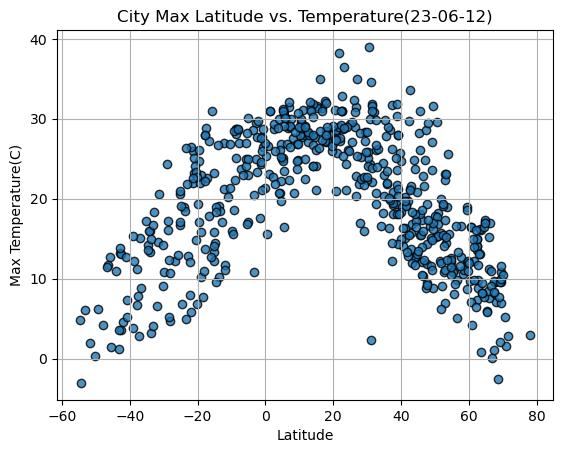

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat, max_temps,
edgecolor="black", linewidth=1, marker="o",
alpha= 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

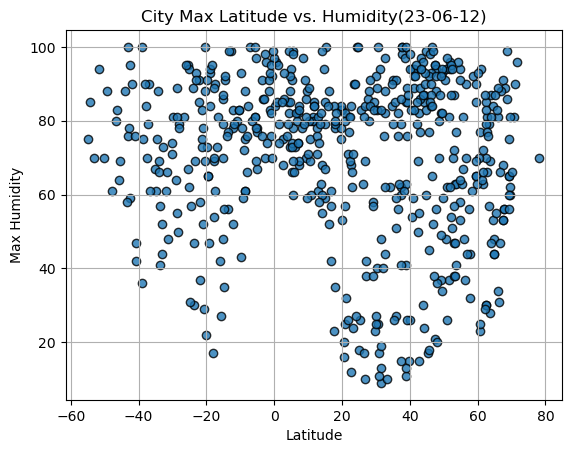

In [56]:
# Build scatter plot for latitude vs. humbidity
plt.scatter(lat, humidity,
edgecolor="black", linewidth=1, marker="o",
alpha= 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

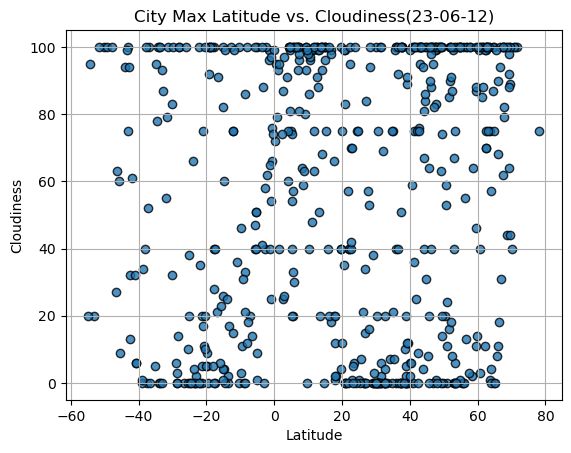

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, cloudiness,
edgecolor="black", linewidth=1, marker="o",
alpha= 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

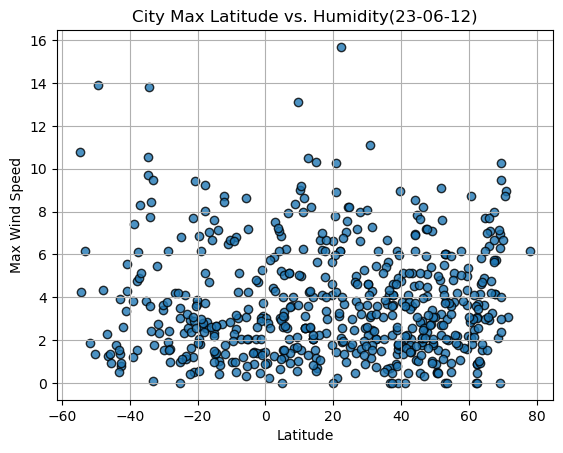

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, wind_speed,
edgecolor="black", linewidth=1, marker="o",
alpha= 0.8, label= "Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
#%whos.head

UsageError: Line magic function `%whos.head()` not found.


In [61]:
# ignore this code - this was for me to figure out Linear Regression 
# Planning to Define a function to create Linear Regression plots
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")

def run_linear_reg(x_values, y_values)
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#create function
plt.scatter(x_values, y_values,
edgecolor="black", linewidth=1, marker="o",
alpha= 0.8, label= "Cities")
plt.plot(x_values,regress_values,color = "r")
plt.annotate(line_eq,(-50,280),color = "r")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

SyntaxError: expected ':' (1903071196.py, line 6)

In [85]:
#defining the linear regression
def create_linear_regression(x_values, y_values, title, y_label, annotate_location):
  slope, intercept, r, p, se = linregress(x_values, y_values)
  regress_y = slope * x_values + intercept
  regress_annotation = f"y = {slope:.4f}x + {intercept:.4f}"

  plt.scatter(x_values, y_values, c="b")
  plt.plot(x_values, regress_y, c="r")
  plt.annotate(regress_annotation, annotate_location, c="r", fontsize=15)
  plt.title(title)
  plt.xlabel("Latitude")
  plt.ylabel(y_label)
  plt.grid(True)
  print(f"The p value is {p:.4f} and the r value is {r:.4f}")



In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0] 
# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arrifes,37.7667,-25.7000,18.14,100,100,4.12,PT,1686625376
3,kudahuvadhoo,2.6708,72.8944,28.74,75,87,5.87,MV,1686625231
4,tazovsky,67.4667,78.7000,1.06,91,100,7.98,RU,1686625376
5,vila franca do campo,37.7167,-25.4333,19.23,98,100,4.64,PT,1686625376
6,colonia,50.9333,6.9500,18.25,62,0,1.54,DE,1686625321


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuku'alofa,-21.1333,-175.2000,23.19,78,75,0.51,TO,1686625376
2,bredasdorp,-34.5322,20.0403,14.19,75,78,10.56,ZA,1686625376
7,conde,-7.2597,-34.9075,23.70,100,20,2.06,BR,1686625377
9,blackmans bay,-43.0167,147.3167,13.18,76,100,3.92,AU,1686625377
12,adamstown,-25.0660,-130.1015,20.53,62,38,3.01,PN,1686625377


###  Temperature vs. Latitude Linear Regression Plot

The p value is 0.0000 and the r value is -0.7716


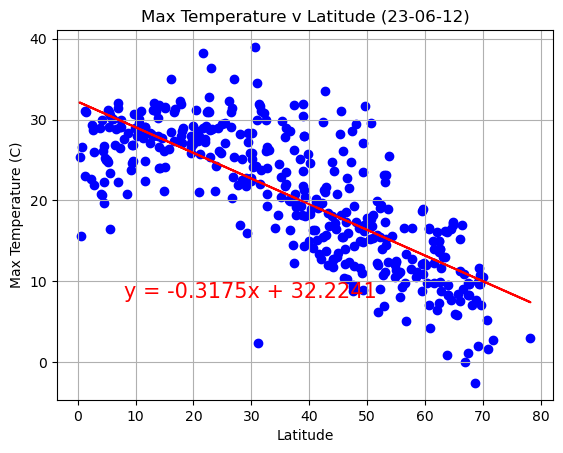

In [88]:
# Linear regression on Northern Hemisphere
create_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Max Temp"],
    title = f"Max Temperature v Latitude ({current_date})",
    y_label = "Max Temperature (C)",
    annotate_location = (8, 8)
)
plt.savefig("output_data/NTvsL_lr.png")

# Show plot
#plt.show()


The p value is 0.0000 and the r value is 0.7248


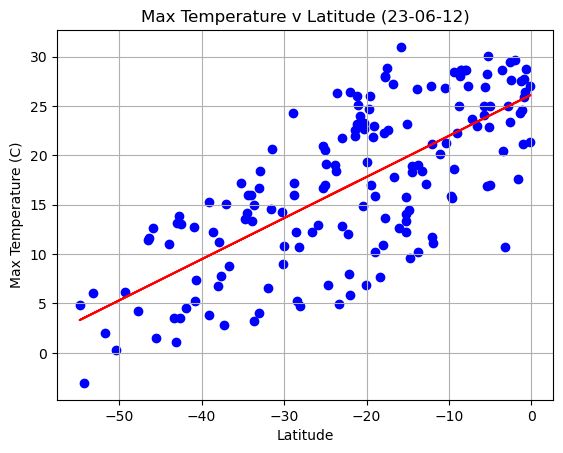

In [89]:
# Linear regression on Southern Hemisphere
create_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Max Temp"],
    title = f"Max Temperature v Latitude ({current_date})",
    y_label = "Max Temperature (C)",
    annotate_location = (8, 8)
)
plt.savefig("output_data/STvsL_lr.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The p value is 0.0337 and the r value is -0.1057


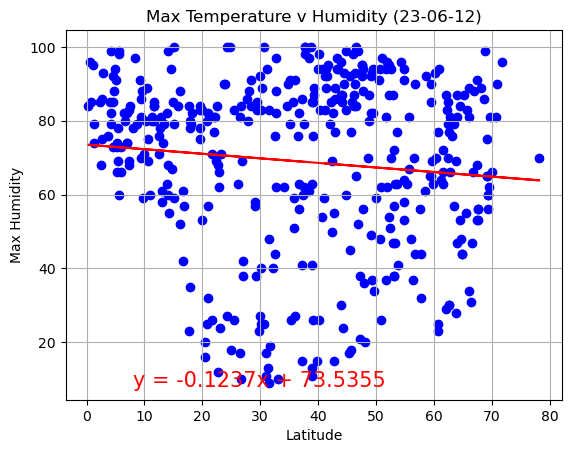

In [90]:
# Northern Hemisphere
create_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Humidity"],
    title = f"Max Temperature v Humidity ({current_date})",
    y_label = "Max Humidity",
    annotate_location = (8, 8)
)
plt.savefig("output_data/NHvsL_lr.png")

# Show plot
plt.show()

The p value is 0.0442 and the r value is 0.1564


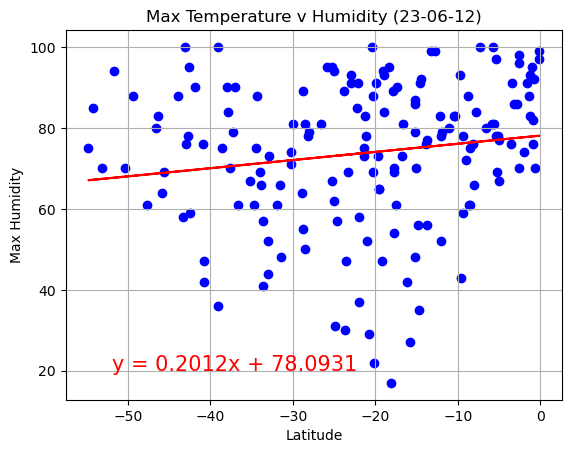

In [91]:
# Southern Hemisphere
create_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Humidity"],
    title = f"Max Temperature v Humidity ({current_date})",
    y_label = "Max Humidity",
    annotate_location = (-52, 20)
)
plt.savefig("output_data/SHvsL_lr.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [92]:
Discussion: 

SyntaxError: invalid syntax (1080283986.py, line 1)

### Cloudiness vs. Latitude Linear Regression Plot

The p value is 0.6549 and the r value is 0.0223


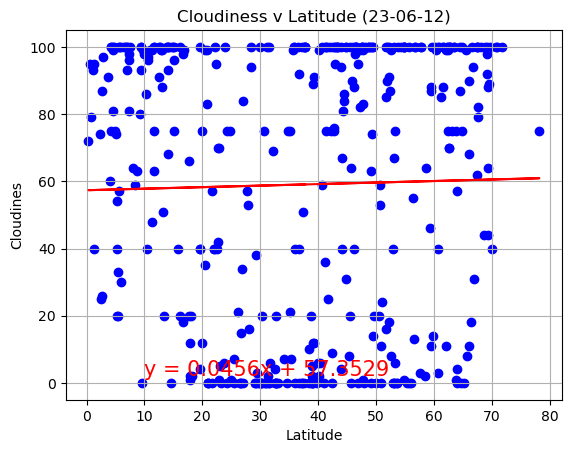

In [93]:
# Northern Hemisphere
create_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Cloudiness"],
    title = f"Cloudiness v Latitude ({current_date})",
    y_label = "Cloudines",
    annotate_location = (10, 2)
)
plt.savefig("output_data/NCvsL_lr.png")

# Show plot
plt.show()

The p value is 0.6648 and the r value is -0.0339


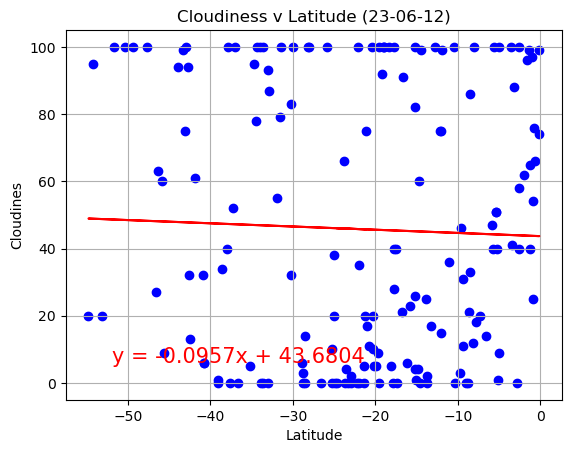

In [94]:
# Southern Hemisphere
create_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Cloudiness"],
    title = f"Cloudiness v Latitude ({current_date})",
    y_label = "Cloudines",
    annotate_location = (-52, 6)
)
plt.savefig("output_data/SCvsL_lr.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Discussion: 

### Wind Speed vs. Latitude Linear Regression Plot

The p value is 0.7599 and the r value is -0.0152


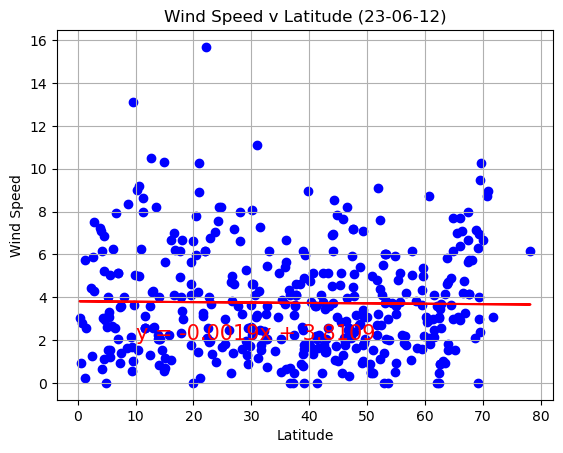

In [95]:
# Northern Hemisphere
create_linear_regression(
    x_values = northern_hemi_df["Lat"],
    y_values = northern_hemi_df["Wind Speed"],
    title = f"Wind Speed v Latitude ({current_date})",
    y_label = "Wind Speed",
    annotate_location = (10, 2)
)
plt.savefig("output_data/NWvsL_lr.png")

# Show plot
plt.show()

The p value is 0.0316 and the r value is -0.1669


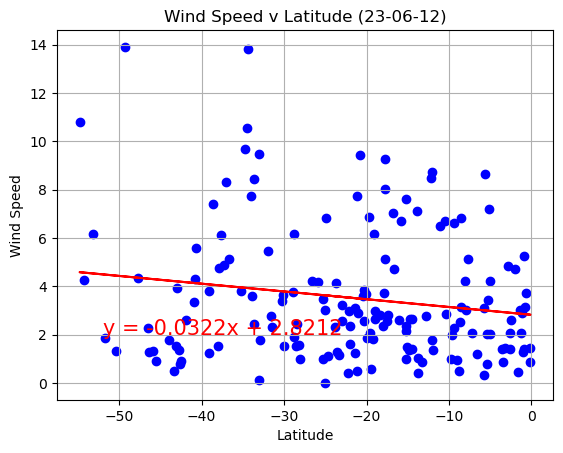

In [96]:
# Southern Hemisphere
create_linear_regression(
    x_values = southern_hemi_df["Lat"],
    y_values = southern_hemi_df["Wind Speed"],
    title = f"Wind Speed v Latitude ({current_date})",
    y_label = "Wind Speed",
    annotate_location = (-52, 2)
)
plt.savefig("output_data/SWvsL_lr.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Discussion